In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\rudra\Downloads\Employee.csv")
data.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## Age Group

In [4]:
data['Age_Group']=pd.cut(data['Age'],
                         bins=[19,24,30,36,42],
                         include_lowest=True,
                         labels=['Under-25','25-30','31-36','37-42']
                        )
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Age_Group
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,31-36
1,Bachelors,2013,Pune,1,28,Female,No,3,1,25-30
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,37-42
3,Masters,2016,Bangalore,3,27,Male,No,5,1,25-30
4,Masters,2017,Pune,3,24,Male,Yes,2,1,Under-25


## Age Group Wise Churn Rate

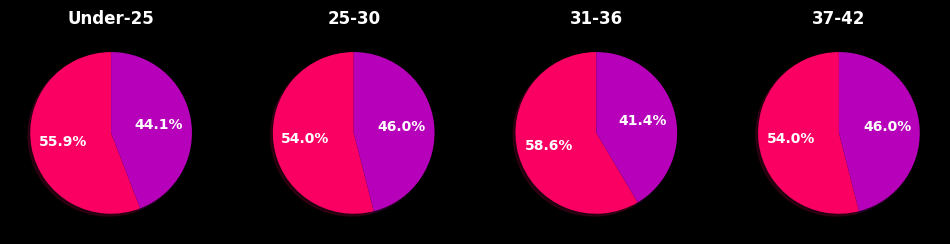

In [12]:
plt.figure(figsize=(12,10),facecolor=("k"))
plt.subplot(1,4,1)
data1=data[data['Age_Group']=='Under-25']
gp=data1.groupby('Gender').agg(Total=('LeaveOrNot','sum')).sort_values('Total',ascending=False).reset_index()
plt.pie(gp['Total'],autopct="%0.1f%%",shadow=True,textprops={'color':'w','fontweight':'bold'},
       colors=['#fa0063','#b700b9'],startangle=90)
plt.title("Under-25",color='w',fontweight='bold',fontsize=12)
plt.subplot(1,4,2)
data2=data[data['Age_Group']=='25-30']
gp1=data2.groupby('Gender').agg(Total=('LeaveOrNot','sum')).sort_values('Total',ascending=False).reset_index()
plt.pie(gp1['Total'],autopct="%0.1f%%",shadow=True,textprops={'color':'w','fontweight':'bold'},
       colors=['#fa0063','#b700b9'],startangle=90)
plt.title("25-30",color='w',fontweight='bold',fontsize=12)
plt.subplot(1,4,3)
data3=data[data['Age_Group']=='31-36']
gp2=data3.groupby('Gender').agg(Total=('LeaveOrNot','sum')).sort_values('Total',ascending=False).reset_index()
plt.pie(gp2['Total'],autopct="%0.1f%%",shadow=True,textprops={'color':'w','fontweight':'bold'},
       colors=['#fa0063','#b700b9'],startangle=90)
plt.title("31-36",color='w',fontweight='bold',fontsize=12)
plt.subplot(1,4,4)
data4=data[data['Age_Group']=='37-42']
gp3=data4.groupby('Gender').agg(Total=('LeaveOrNot','sum')).sort_values('Total',ascending=False).reset_index()
plt.pie(gp1['Total'],autopct="%0.1f%%",shadow=True,textprops={'color':'w','fontweight':'bold'},
       colors=['#fa0063','#b700b9'],startangle=90)
plt.title("37-42",color='w',fontweight='bold',fontsize=12)
plt.show()

## Gender Wise Churn Rate

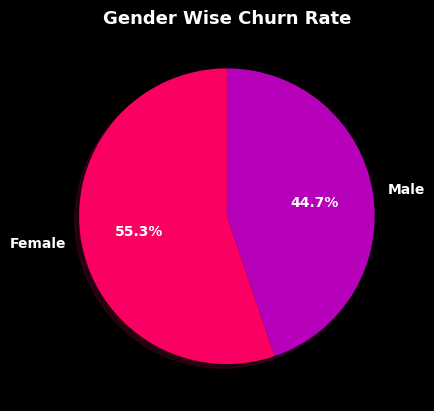

In [44]:
gp=data.groupby('Gender').agg(Total=('LeaveOrNot','sum')).sort_values('Total',ascending=False).reset_index()
plt.figure(facecolor=("k"),figure=(5,2))
plt.pie(gp['Total'],labels=gp['Gender'],autopct="%0.1f%%",shadow=True,startangle=90,
       textprops={'color':'w','fontweight':'bold'},
       colors=['#fa0063','#b700b9'])
plt.title("Gender Wise Churn Rate",color='w',fontsize=13,fontweight='bold')
plt.show()

## City Wise Churn Rate

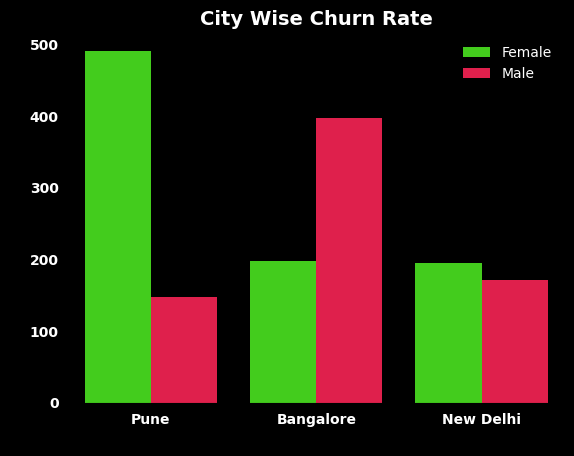

In [67]:
gp=data.groupby(['City','Gender']).agg(Total=('LeaveOrNot','sum')).sort_values('Total',ascending=False).reset_index()
plt.figure(facecolor=("k"))
ax=sns.barplot(data=gp,x='City',y='Total',hue='Gender',palette='prism')
ax.set_facecolor("k")
plt.xticks(color='w',fontweight='bold')
plt.yticks(color='w',fontweight='bold')
plt.title("City Wise Churn Rate",color='w',fontweight='bold',fontsize=14)
plt.legend(frameon=False,labelcolor='w')
plt.show()

## Education Wise Churn rate

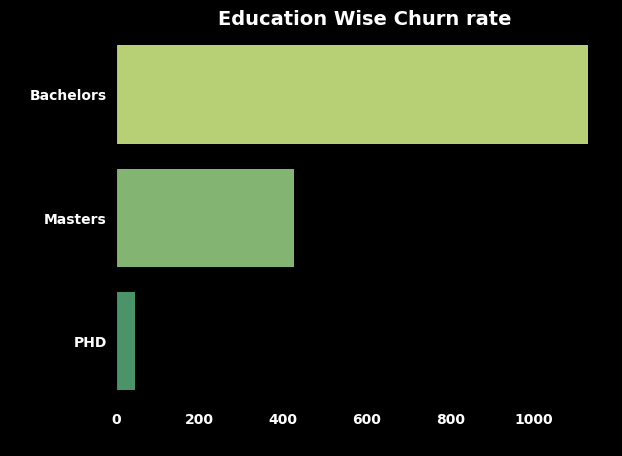

In [149]:
plt.figure(facecolor=("k"))
ax=sns.barplot(data=data,y='Education',x='LeaveOrNot',estimator=sum,ci=0,palette='summer_r')
ax.set_facecolor("k")
plt.xticks(color='w',fontweight='bold')
plt.yticks(color='w',fontweight='bold')
plt.title("Education Wise Churn rate",color='w',fontweight='bold',fontsize=14)
plt.show()

## Year Wise Churn

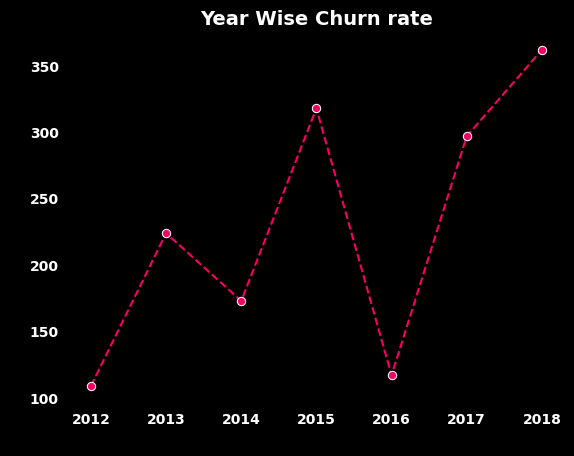

In [184]:
gp=data.groupby('JoiningYear').agg(Total=('LeaveOrNot','sum')).sort_values('Total',ascending=False).reset_index()
plt.figure(facecolor=("k"))
ax=sns.lineplot(data=gp,x='JoiningYear',y='Total',marker='o',color='#fa0063',linestyle='--')
ax.set_facecolor("k")
plt.xticks(color='w',fontweight='bold')
plt.yticks(color='w',fontweight='bold')
plt.title("Year Wise Churn rate",color='w',fontweight='bold',fontsize=14)
plt.show()
